In [1]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from aquire import get_titanic_data
from prepare import prep_titanic_data

df=prep_titanic_data(get_titanic_data())


In [2]:
df=df[pd.notna(df.age)]
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [3]:
train_df, test_df= train_test_split(df,test_size=.30,random_state=123,stratify=df[['survived']])

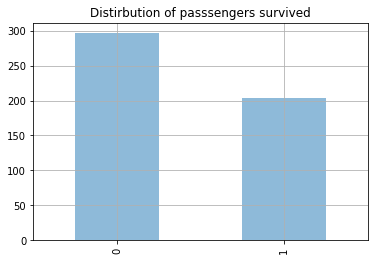

In [4]:
train_df.survived.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

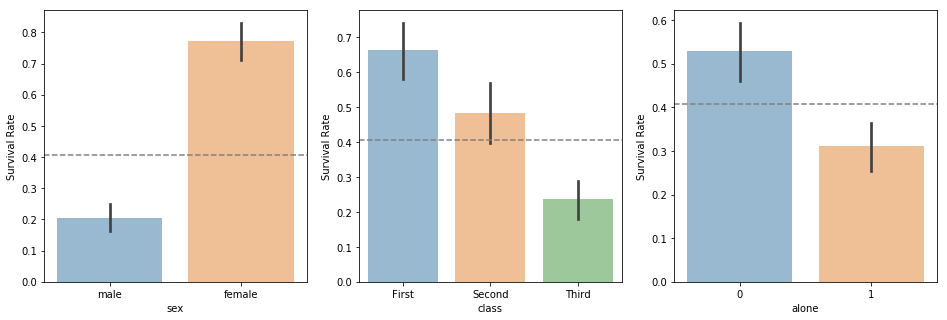

In [5]:
features=['sex','class','alone']
_,ax=plt.subplots(nrows=1,ncols=3,figsize=(16,5))
survival_rate=train_df.survived.mean()
for i, feature in enumerate(features):
    sns.barplot(feature,'survived',data=train_df,ax=ax[i],alpha=0.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate,ls='--',color='grey')

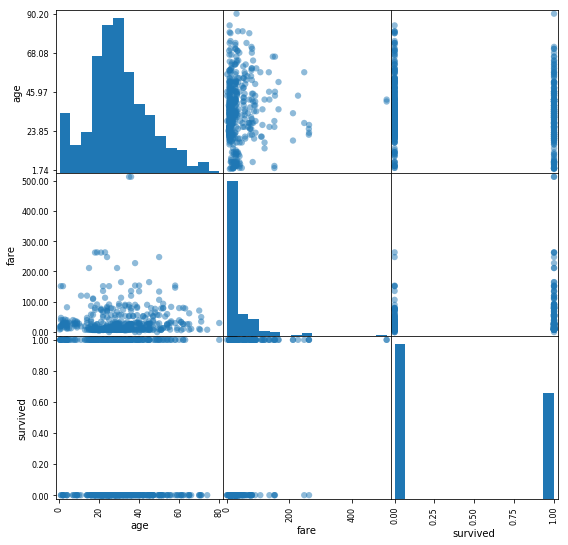

In [6]:
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

cmap = cm.get_cmap('gnuplot')
axes = pd.plotting.scatter_matrix(
    train_df[['age','fare','survived']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

In [7]:
import scipy as sp 
import numpy as np

sp.stats.ttest_ind(
    train_df[train_df.survived == 1].age.dropna(),
    train_df[train_df.survived == 0].age.dropna())

Ttest_indResult(statistic=-2.012224018867312, pvalue=0.04473535126710687)

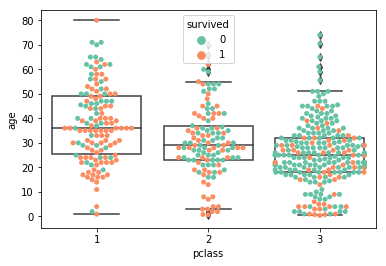

In [8]:
sns.swarmplot(x="pclass", y="age", data=train_df, hue="survived", palette="Set2")
ax = sns.boxplot(x="pclass", y="age", data=train_df,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

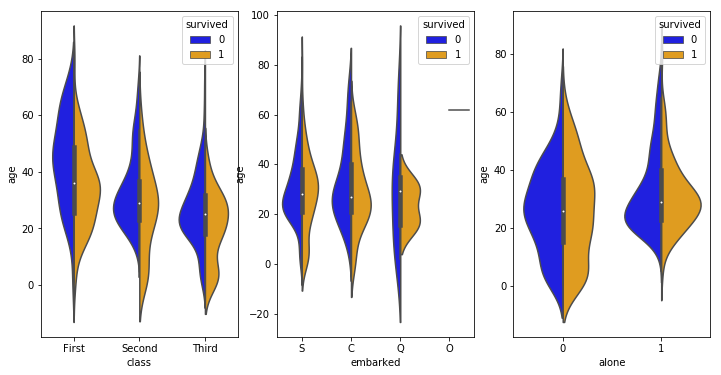

In [9]:
# 3. violin plot
features = ['class', 'embarked', 'alone']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'age', hue='survived',
        data=train_df, split=True, ax=ax[i], palette=['blue','orange'])

In [12]:
pd.crosstab(train_df.pclass, train_df.survived, margins=True).style.background_gradient(cmap='YlOrRd')

survived,0,1,All
pclass,,,
1,44,87,131
2,61,57,118
3,191,59,250
All,296,203,499


In [13]:
train_df.fare.describe()

count    499.000000
mean      34.972027
std       52.398021
min        0.000000
25%        8.050000
50%       15.850000
75%       34.375000
max      512.329200
Name: fare, dtype: float64

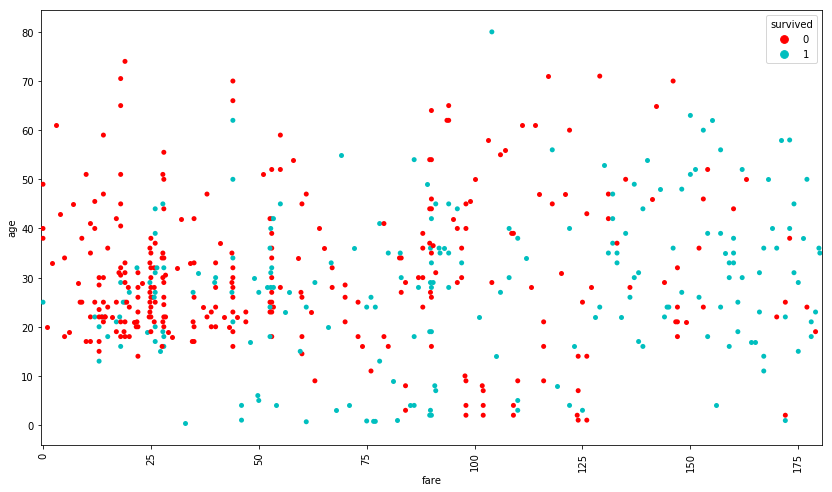

In [16]:
plt.figure(figsize=(14,8))

p = sns.swarmplot(x='fare', y='age', hue='survived',
                  palette=["r", "c"], data=train_df)


loc = plt.xticks(list(range(0,200,25)))
p.set_xticklabels(labels=list(range(0,200,25)), rotation=90, fontsize=10)

plt.show()

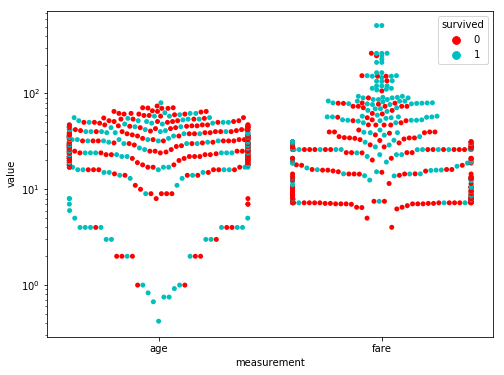

In [21]:
# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train_df[['survived','age','fare']], "survived", var_name="measurement")
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="measurement", y="value", hue="survived",
              palette=["r", "c", "y"], data=df_melt)
p.set(yscale="log")

plt.show()